In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/MyDrive/Colab Notebooks/DO AN

/content/drive/MyDrive/Colab Notebooks/DO AN


In [3]:
#Nhập các thư viên sử dụng
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping 


In [4]:
#Đọc file dữ liệu train
pathtrain = "/content/drive/MyDrive/Colab Notebooks/DO AN/Bruska_training.xlsx"
datatrain = pd.read_excel(pathtrain)
#Đọc file dữ liệu test
pathtest = "/content/drive/MyDrive/Colab Notebooks/DO AN/Bruska_test.xlsx"
datatest = pd.read_excel(pathtest)

In [5]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7598 entries, 0 to 7597
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STT                               7598 non-null   int64  
 1   time stamp                        7598 non-null   object 
 2   Bruska_wind speed                 7598 non-null   float64
 3   Bruska_wind direction             7598 non-null   float64
 4   Bruska_air density                7598 non-null   float64
 5   Zelengrad_wind speed              7598 non-null   float64
 6   Zelengrad_wind direction          7598 non-null   float64
 7   Zelengrad_air density             7598 non-null   float64
 8   Bruska_active power output        7598 non-null   float64
 9   Bruska_normally operating number  7598 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 593.7+ KB


In [6]:
dttrain = datatrain.dropna()
dttest = datatest.dropna()

In [7]:
dttrain.head(15)

,STT,time stamp,Bruska_wind speed,Bruska_wind direction,Bruska_air density,Zelengrad_wind speed,Zelengrad_wind direction,Zelengrad_air density,Bruska_active power output,Bruska_normally operating number
0,1,01/01/2018 0:00,9.363334,172.79999,1.210,10.635238,165.28897,1.207,21.608133,14
1,2,01/01/2018 1:00,9.266666,174.99990,1.210,10.261664,166.09566,1.207,21.050860,14
2,3,01/01/2018 2:00,9.586667,174.19984,1.209,13.286666,161.92586,1.207,21.257930,14
3,4,01/01/2018 3:00,9.320000,167.53835,1.208,14.777143,159.17044,1.206,20.700977,14
4,5,01/01/2018 4:00,9.267742,160.91630,1.207,11.447466,151.64941,1.205,20.331597,14
5,6,01/01/2018 5:00,9.447224,156.49992,1.206,6.900794,135.96718,1.203,20.613353,14
6,7,01/01/2018 8:00,10.400002,150.00010,1.201,8.784762,116.32642,1.199,26.022413,15
7,8,01/01/2018 9:00,9.816668,148.22217,1.199,10.744286,121.19638,1.197,26.146120,16
8,9,01/01/2018 10:00,10.386666,150.44443,1.196,11.446429,138.76936,1.194,28.766650,16
9,10,01/01/2018 11:00,10.776667,147.83327,1.193,13.413571,136.55336,1.191,30.532980,16


Text(0.5, 1.0, 'Công suất phát nhà máy điện gió theo vận tốc gió')

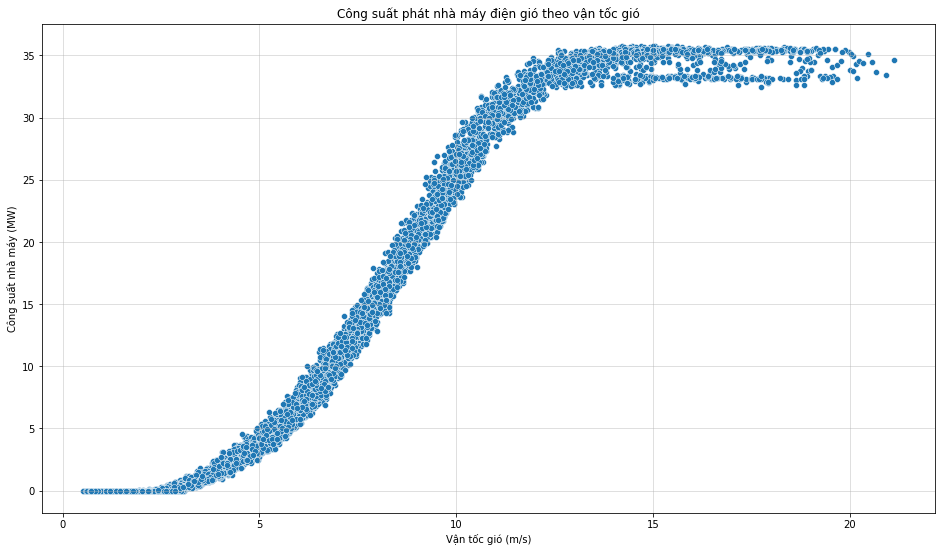

In [8]:
plt.figure(figsize=(16,9))
plt.grid(alpha=0.5)
sns.scatterplot(data = dttrain, x= "Bruska_wind speed", y="Bruska_active power output")
plt.xlabel("Vận tốc gió (m/s)")
plt.ylabel("Công suất nhà máy (MW)")
plt.title("Công suất phát nhà máy điện gió theo vận tốc gió")

In [9]:
#Chia tập dữ liệu thành các biến đầu vào và đầu ra
cot = ["Bruska_wind speed","Bruska_wind direction","Bruska_air density"]
x_train = dttrain[cot].values
y_train = dttrain["Bruska_active power output"].values
x_test = dttest[cot].values
y_test = dttest["Bruska_active power output"].values

In [19]:
model= Sequential()
model.add(Dense(3, input_shape=(3,), kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))

#Output layer
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
#Fit model
model.fit(x_train, y_train, batch_size=32, epochs = 5000, callbacks = [EarlyStopping(monitor = 'loss', patience = 100)])
#Dự đoán
y_pred=model.predict(x_test)

Epoch 1/5000
238/238 [==============================] - 1s 2ms/step - loss: 105.7172 - mean_absolute_percentage_error: 713799296.0000
Epoch 2/5000
238/238 [==============================] - 1s 2ms/step - loss: 5.9361 - mean_absolute_percentage_error: 174076784.0000
Epoch 3/5000
238/238 [==============================] - 1s 2ms/step - loss: 4.3082 - mean_absolute_percentage_error: 46855392.0000
Epoch 4/5000
238/238 [==============================] - 1s 2ms/step - loss: 3.6128 - mean_absolute_percentage_error: 36715096.0000
Epoch 5/5000
238/238 [==============================] - 1s 2ms/step - loss: 3.1347 - mean_absolute_percentage_error: 34171096.0000
Epoch 6/5000
238/238 [==============================] - 1s 2ms/step - loss: 2.5308 - mean_absolute_percentage_error: 30027356.0000
Epoch 7/5000
238/238 [==============================] - 1s 2ms/step - loss: 2.5623 - mean_absolute_percentage_error: 40611740.0000
Epoch 8/5000
238/238 [==============================] - 1s 2ms/step - loss: 2.1

In [20]:
#Tính mape
mape=[]
for i in range(0,len(y_test)):
  mape.append(abs((y_test[i]-y_pred[i])/y_test[i])*100)
mapetb=np.mean(mape)
print("MAPE trung bình:",mapetb)
pd.DataFrame({"Thực tế":y_test, "Dự đoán":y_pred.flatten(), "MAPE":mape})  

MAPE trung bình: 4.4703135


,Thực tế,Dự đoán,MAPE
0,25.108043,25.508699,[1.5957266]
1,25.342627,25.903212,[2.2120242]
2,24.090957,24.580551,[2.0322788]
3,24.802283,24.747383,[0.2213551]
4,27.237547,26.950720,[1.0530577]
...,...,...,...
225,2.452700,2.339668,[4.608486]
226,3.673750,3.651983,[0.5924852]
227,13.952547,12.154206,[12.888978]
228,25.916253,25.257803,[2.5406876]


In [15]:
# Lưu file kết quả
tt = pd.DataFrame(y_test)
dd = pd.DataFrame(y_pred)
mape = pd.DataFrame(mape)
final_data = pd.concat([tt, dd, mape], axis=1)
final_data.to_csv("kqnn.csv", header=["Thực tế", "Dự đoán", "MAPE"])

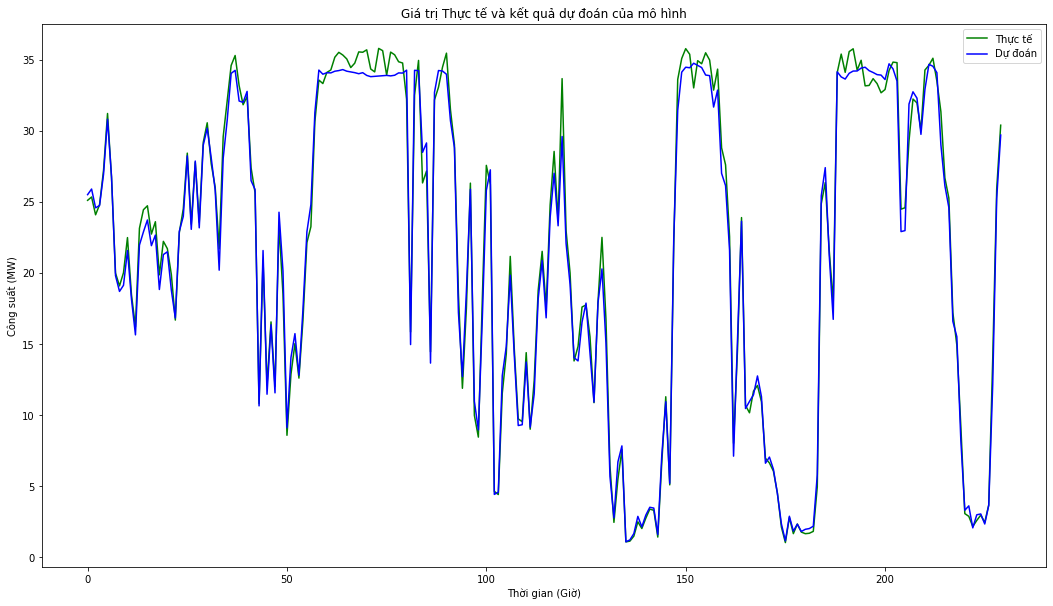

In [21]:
# Vẽ đồ thị giá trị
plt.figure(figsize=(18,10))
plt.plot(y_test, color = 'green', label = 'Thực tế')
plt.plot(y_pred, color = 'blue', label = 'Dự đoán')
plt.xlabel("Thời gian (Giờ)")
plt.ylabel("Công suất (MW)")
plt.title("Giá trị Thực tế và kết quả dự đoán của mô hình")
plt.legend()